This tutorial is part of the course of Numerical Astrophysics (AGA5914), University of São Paulo (IAG/USP).

Details about the course can be found in the website:
  https://numericalastrophysics.wordpress.com/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We assume a circle of radius r.
The equation of a circle is
$$x^2 + y^2 = r^2,$$ 
which can be rewritten as:
$$y = \sqrt{r^2 - x^2}$$
The area of this circles is $\pi r^2$, which is also the integral of the above expression (times 4).
So:
$$\dfrac{\pi r^2}{4} = \int\limits^r_0 \sqrt{r^2 - x^2}.$$
Then:
$$\pi = \dfrac{4}{r^2} \int\limits_0^r \sqrt{r^2 - x^2}.$$
We are going to pick $n$ points for x and y.

In [2]:
r = 1. # assumption
n = 1000000 # number of samples
x = np.random.uniform(0, r, n) # draw random numbers in interval
y = np.random.uniform(0, r, n) # draw random numbers in interval

Now we need to compute the integral. For that, we take the fraction of the n points falling inside the circle defined by the equation:
$$x^2 + y^2 <= r^2.$$
The code snippet below is NOT the most efficient way to do this, but is more understandable. In real problems, avoid using loops in Python.

In [3]:
counter = 0. # cumulative counter (<= n)
pi_arr = []
for i in range(n):
    if x[i] ** 2 + y[i] ** 2 <= 1.:
        counter += 1
        pi = 4 * counter / (i + 1)
        pi_arr.append(pi)

Let's now plot what we got.

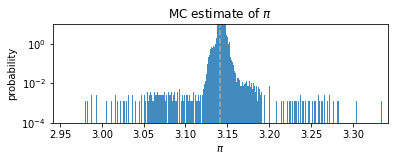

In [4]:
plt.subplot(211)
m, bins, patches = plt.hist(pi_arr, 1000, density = True, alpha = 0.85)
plt.plot(np.ones(10) * np.pi, np.logspace(-4, 1, 10), color = 'darkgray', linestyle = '--')  # true value
plt.xlabel('$\\pi$')
plt.ylabel('probability')
plt.title('MC estimate of $\\pi$')
plt.axis([np.pi - .2, np.pi + .2, 1e-4, 10.])
plt.yscale('log')

From the above plot we can see that most of our random trails generate values close to the real value of $\pi$ (attention to the log-scale in the y-axis!).
Let's now plot the residuals

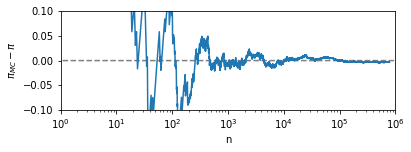

In [9]:
plt.subplot(212)
dPi = pi_arr - np.ones(len(pi_arr)) * np.pi
plt.plot(np.arange(n), np.zeros(n), color = 'grey', linestyle = '--')  # true value
plt.plot(np.arange(len(pi_arr)), dPi)  
plt.ylabel('$\\pi_{MC} - \\pi$')
plt.xlabel('n')
plt.axis([1, n, -.1, .1])
plt.xscale('log')

The plot above shows the difference between the Monte Carlo value of $\pi$ and it's actual values as a function of the number of samples. Note the convergence: the residuals go to zero as the sample increases.